<a href="https://colab.research.google.com/github/n-erfan/Data-Mining-Machine-Learning/blob/main/MiniProject4_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download these two images (Recording-1.png and Recording-2.png) from Canvas. Then use the
ICA algorithm to separate the distortion from the main image. Implement Fast-ICA algorithm
for noise separation

In [ ]:
#Access to Read from my Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import necessary librarires
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.io
import imageio as iio
import matplotlib.image as mpimg

In [ ]:
rec1 = mpimg.imread("/content/gdrive/MyDrive/Dataset/Data Mining and Machine Learning/Recording-1.png")
rec2 = mpimg.imread("/content/gdrive/MyDrive/Dataset/Data Mining and Machine Learning/Recording-2.png")

In [ ]:
# shows the facial image of a given image vector
def show_signal(image_vector):
  image = image_vector.reshape((567, 800))
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()

In [ ]:
rec1.shape

(567, 800)

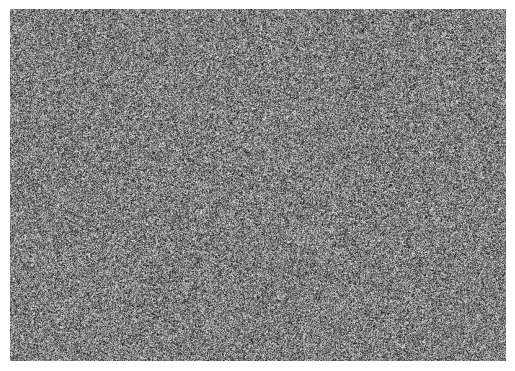

In [ ]:
show_signal(rec1)

In [ ]:
rec2

array([[0.5058824 , 0.45490196, 0.88235295, ..., 0.49411765, 0.92156863,
        0.14901961],
       [0.90588236, 0.84313726, 0.00784314, ..., 0.57254905, 0.4392157 ,
        0.70980394],
       [0.49803922, 0.74509805, 0.49411765, ..., 0.92941177, 0.52156866,
        0.4509804 ],
       ...,
       [0.45490196, 0.5294118 , 0.24705882, ..., 0.9372549 , 0.08235294,
        0.10196079],
       [0.2509804 , 0.9529412 , 0.24313726, ..., 0.58431375, 0.68235296,
        0.25882354],
       [0.78039217, 0.88235295, 0.42352942, ..., 0.44705883, 0.4745098 ,
        0.05490196]], dtype=float32)

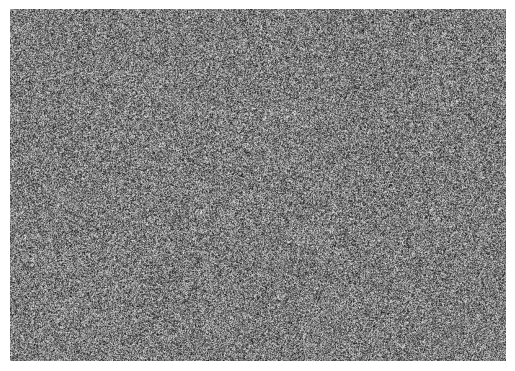

In [ ]:
show_signal(rec2)

In [ ]:
# Combine the image data into a mixing matrix
x = np.vstack((rec1.flatten(), rec2.flatten()))
x.shape

(2, 453600)

In [ ]:
m = np.mean(x, axis=1).reshape((2,1))
m

array([[0.49677646],
       [0.4903665 ]], dtype=float32)

In [ ]:
X = x - m

In [ ]:
# Calculate the covariance matrix on the centered data X
cov_matrix = np.cov(X)

# Perform eigenvalue decomposition on the covariance matrix
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

# Whitening transformation on x
whitening_matrix = eig_vectors @ np.diag(1.0 / np.sqrt(eig_values)) @ eig_vectors.T
whitened_x = whitening_matrix @ X

In [ ]:
whitened_x.shape

(2, 453600)

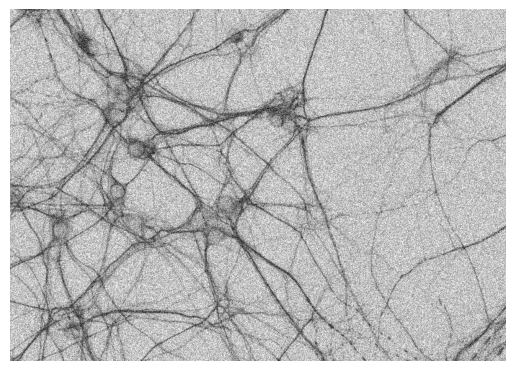

In [ ]:
show_signal(whitened_x[0,:])

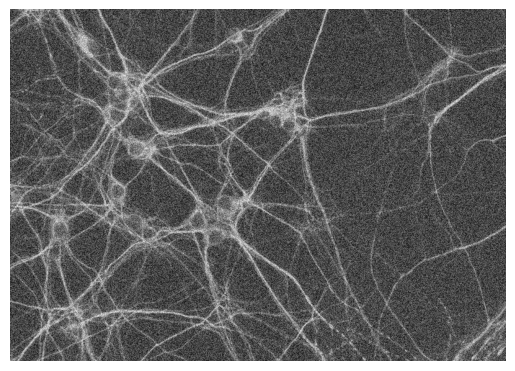

In [ ]:
show_signal(whitened_x[1,:])

In [ ]:
def g(x):
  return -np.exp(-x**2 / 2)

In [ ]:
def g_prime(x):
  return x * np.exp(-x**2 / 2)

In [ ]:
def Fast_ICA(X):
  iter = 500
  thresh = 1e-5
  n = X.shape[0]
  random_matrix = np.random.rand(n, n)
  # Weight matrix with orthogonal vectors
  W = np.linalg.qr(random_matrix)[0]

  for i in range(n):
    w = W[i, :].reshape(n, 1)

    for _ in range(iter):
      w_new = (X * g(w.T @ X)).mean(axis=1).reshape(n,1) - g_prime(w.T @ X).mean() * w
      w_new /= np.sqrt((w_new ** 2).sum())

      # Aapo Hyvärinen's algorithm implementation to converge rest of the IC orthogonally
      if i != 0:
        w_new -= W[:i].T @ W[:i] @ w_new

      # Compare weight convergence threshold for early break
      if np.abs((w.T @ w_new) - 1) <= thresh:
        w = w_new
        break
      else:
        w = w_new

    W[i, :] = w.T

  S = W @ X

  return W, S

In [ ]:
W, S = Fast_ICA(whitened_x)

In [ ]:
W

array([[-0.68698421,  0.72667235],
       [-0.00714092, -0.00675091]])

In [ ]:
# Calculate the bias
S_avg = W @ m
S_avg

array([[ 0.01505818],
       [-0.00685786]])

In [ ]:
# Add back the bias to get original signals
S_org = S_avg + S

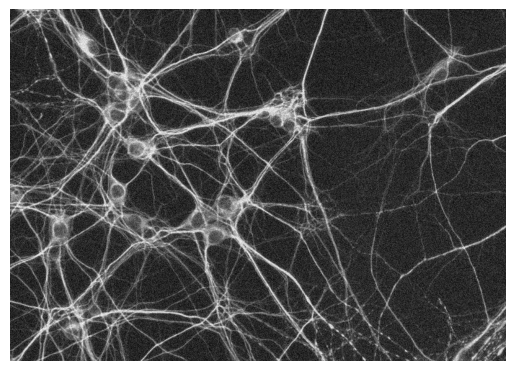

In [ ]:
show_signal(S_org[0,:])

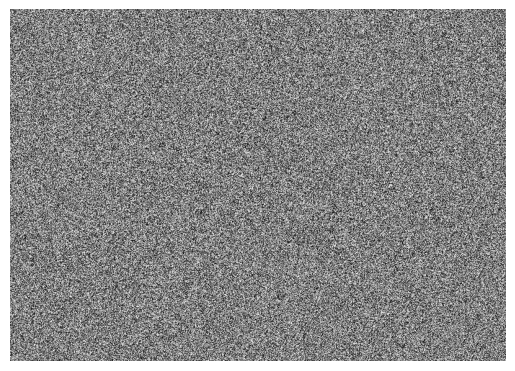

In [ ]:
show_signal(S_org[1,:])

Implementation using python library: FastICA

In [ ]:
from sklearn.decomposition import FastICA

In [ ]:
# Combine the image data into a mixing matrix
X = np.c_[rec1.flatten(), rec2.flatten()]

# Center the signals
X_centered = X - np.mean(X, axis=0)

# Whitening the centered signals
cov_matrix = np.cov(X_centered, rowvar=False)
eig_values, eig_vectors = np.linalg.eigh(cov_matrix)
whitening_matrix = eig_vectors @ np.diag(1.0 / np.sqrt(eig_values)) @ eig_vectors.T
X_whitened = np.dot(X_centered, whitening_matrix)

In [ ]:
X_whitened

array([[ 0.20835803, -0.13070039],
       [ 0.23235776, -0.41262554],
       [ 1.19270898,  0.78593528],
       ...,
       [ 0.23605003, -0.45599862],
       [ 0.2231271 , -0.30419286],
       [-0.74091638, -1.4593806 ]])

In [ ]:
# Perform FastICA to separate the whitened signals
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X_whitened)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


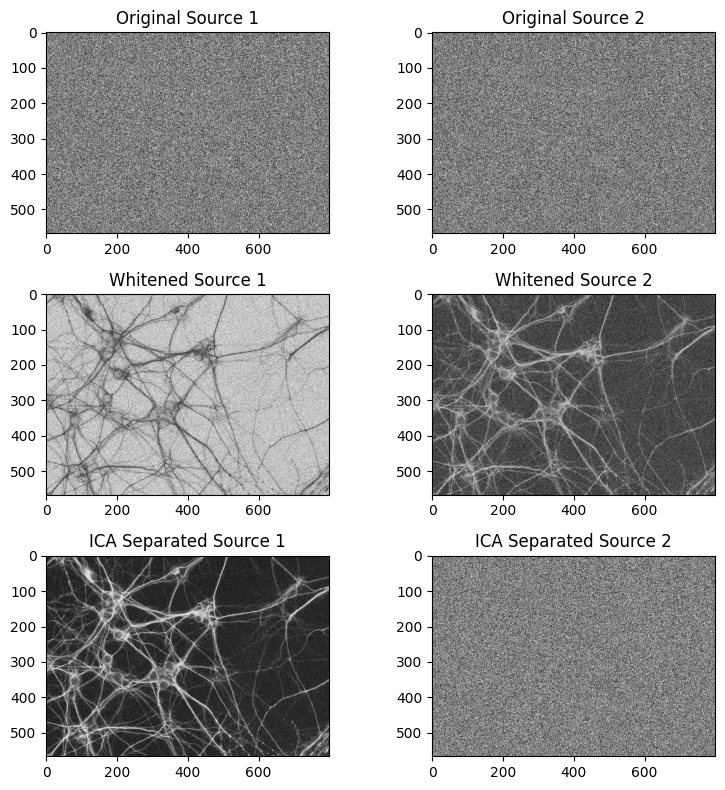

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Plot the original sources

axs[0,0].set_title("Original Source 1")
axs[0,0].imshow(rec1.reshape(567,800), cmap='gray')

axs[0,1].set_title("Original Source 2")
axs[0,1].imshow(rec2, cmap='gray')

# Plot the whitened sources

axs[1,0].set_title("Whitened Source 1")
axs[1,0].imshow(X_whitened[:,0].reshape(567,800), cmap='gray')

axs[1,1].set_title("Whitened Source 2")
axs[1,1].imshow(X_whitened[:,1].reshape((567,800)), cmap='gray')

# Plot the separated sources using ICA

axs[2,0].set_title("ICA Separated Source 1")
axs[2,0].imshow(S_[:, 0].reshape(567, 800), cmap='gray')

axs[2,1].set_title("ICA Separated Source 2")
axs[2,1].imshow(S_[:, 1].reshape(567, 800), cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html "/content/gdrive/MyDrive/Colab Notebooks/MiniProject4.ipynb"

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/MiniProject4.ipynb to html
[NbConvertApp] Writing 4205892 bytes to /content/gdrive/MyDrive/Colab Notebooks/MiniProject4.html
